In [ ]:
import numpy as np # linear algebra
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Datasets Merging

In [ ]:
# Read CSV files
df_ganjar = pd.read_csv("data/ganjar-final-cluster.csv")
df_prabowo = pd.read_csv("data/prabowo-final-cluster.csv")
df_anies = pd.read_csv("data/anies-final-cluster.csv")

In [ ]:
# Display the number of rows of data for each variable
print("Number of data rows Prabowo: {}".format(len(df_prabowo)))
print("Number of data rows Anies: {}".format(len(df_anies)))
print("Number of data rows Ganjar: {}".format(len(df_ganjar)))

# Display the total number of rows of data
total_rows = len(df_ganjar) + len(df_prabowo) + len(df_anies)
print("\nTotal number of rows of data: {}".format(total_rows))

Jumlah baris data Prabowo: 2099
Jumlah baris data Anies: 2520
Jumlah baris data Ganjar: 4001

Jumlah total baris data: 8620


In [ ]:
# Merge datasets into one dataframe
df_all = pd.concat([df_ganjar, df_prabowo, df_anies], ignore_index=True)

# Display total data before deletion
total_data_before = len(df_all)
print(f"Total data sebelum penghapusan: {total_data_before} baris")

# Display the number of duplicate data rows before deletion
duplicate_rows_before = df_all.duplicated(subset='text_join').sum()
print(f"Jumlah baris data duplikat sebelum penghapusan: {duplicate_rows_before}")

# Delete duplicate rows of data based on text_join column
df_all = df_all.drop_duplicates(subset='text_join')

# Display total data after duplicate removal
total_data_after_duplicates = len(df_all)
print(f"Total data setelah penghapusan duplikat: {total_data_after_duplicates} baris")

# Display the number of empty data rows before deletion
null_rows_before = df_all['text_join'].isnull().sum()
print(f"Jumlah baris data kosong sebelum penghapusan: {null_rows_before}")

# Delete data rows with empty or null text_join columns
df_all = df_all.dropna(subset=['text_join'])

# Display total data after blank deletion
total_data_after_nulls = len(df_all)
print(f"Total data setelah penghapusan kosong: {total_data_after_nulls} baris")

# Display the number of duplicate data rows after deletion
duplicate_rows_after = df_all.duplicated(subset='text_join').sum()
print(f"Jumlah baris data duplikat setelah penghapusan: {duplicate_rows_after}")

# Display the number of empty data rows after deletion
null_rows_after = df_all['text_join'].isnull().sum()
print(f"Jumlah baris data kosong setelah penghapusan: {null_rows_after}")

Total data sebelum penghapusan: 8620 baris
Jumlah baris data duplikat sebelum penghapusan: 1594
Total data setelah penghapusan duplikat: 7026 baris
Jumlah baris data kosong sebelum penghapusan: 1
Total data setelah penghapusan kosong: 7025 baris
Jumlah baris data duplikat setelah penghapusan: 0
Jumlah baris data kosong setelah penghapusan: 0


In [ ]:
# Save the results to a new CSV file
df_all.to_csv("all-data-cluster.csv", index=False)

# Process Analysis

In [ ]:
data = pd.read_csv('/data/all-data-cluster.csv')
data.head()

,created_at,username,text,prepros_text,text_join,label
0,Thu Oct 19 22:07:12 +0000 2023,Tohid_siswanto,@OposisiOjol @AdeSudr90969850 @ganjarpranowo @...,calon presiden rakyat ya yg anter rakyat bukan...,calon presiden rakyat anter rakyat wan toamasa...,black-campaign
1,Thu Oct 19 09:19:41 +0000 2023,hari1234t678910,@ch_chotimah2 @ganjarpranowo @mohmahfudmd Mau ...,chotimah mau maju dari manasdh jabat th aja ka...,chotimah maju manasdh jabat th kagak becus nan...,black-campaign
2,Thu Oct 19 08:47:27 +0000 2023,obor2150,@ch_chotimah2 @ganjarpranowo @mohmahfudmd Hala...,chotimah halah siapa yg masih percaya sama pdi...,chotimah halah percaya pdi kecuali orang patah...,black-campaign
3,Thu Oct 19 06:04:52 +0000 2023,JokoGadhang,@GunRomli @mohmahfudmd @ganjarpranowo Ini isti...,ini istilahnya introspeksi diri bukan blunder ...,istilah introspeksi blunder kritik institusi e...,black-campaign
4,Thu Oct 19 00:18:09 +0000 2023,mustafaagus007,@HusinShihab @mohmahfudmd @ganjarpranowo Nguru...,ngurus duit aja kagak becus cuma gede bacot d...,ngurus duit kagak becus gede bacot dpn anggota...,black-campaign


In [ ]:
#reviews = np.array(data['text'])[:1600]
#labels = np.array(data['label'])[:1600]

#dibatasi agar tidak overfitting
#hanya menampilkan 600 baris pertama

In [ ]:
data['text_join'].loc[789]

'dukung jokowi marah gibran gagal cawapres prabowo tuduh dukung ganjar buzer bayar jatuh jokowi dukung buta jokowi sukaria mk kabul gugat'

In [ ]:
data['label'].loc[789]

'black-campaign'

In [ ]:
#Melihat Distribusi Sentimen
from collections import Counter

Counter(data['label'])

Counter({'black-campaign': 4213, 'nonblack-campaign': 2812})

**Data pre-processing**
1.   see if there is null data
2.   view empty data rows
3.   remove null rows
4.   recheck null data
5.   Histogram visualization
6.   Display Total class data
7.   Countplot Visualization



In [ ]:
data=data.rename(
{
    "label":"Category",
    "text_join":"Message"
},
    axis=1
)

In [ ]:
data_subset = data[["Message", "Category"]]
print(data_subset.head())

                                             Message        Category
0  calon presiden rakyat anter rakyat wan toamasa...  black-campaign
1  chotimah maju manasdh jabat th kagak becus nan...  black-campaign
2  chotimah halah percaya pdi kecuali orang patah...  black-campaign
3  istilah introspeksi blunder kritik institusi e...  black-campaign
4  ngurus duit kagak becus gede bacot dpn anggota...  black-campaign


In [ ]:
data.isnull().sum()

created_at      0
username        0
text            0
prepros_text    0
Message         0
Category        0
dtype: int64

In [ ]:
null_data = data[data.isnull().any(axis=1)]
print(null_data)

Empty DataFrame
Columns: [created_at, username, text, prepros_text, Message, Category]
Index: []


In [ ]:
data.dropna(subset=['prepros_text'], inplace=True)

In [ ]:
data.isnull().sum()

created_at      0
username        0
text            0
prepros_text    0
Message         0
Category        0
dtype: int64

In [ ]:
data["Message Length"]=data["Message"].apply(len)

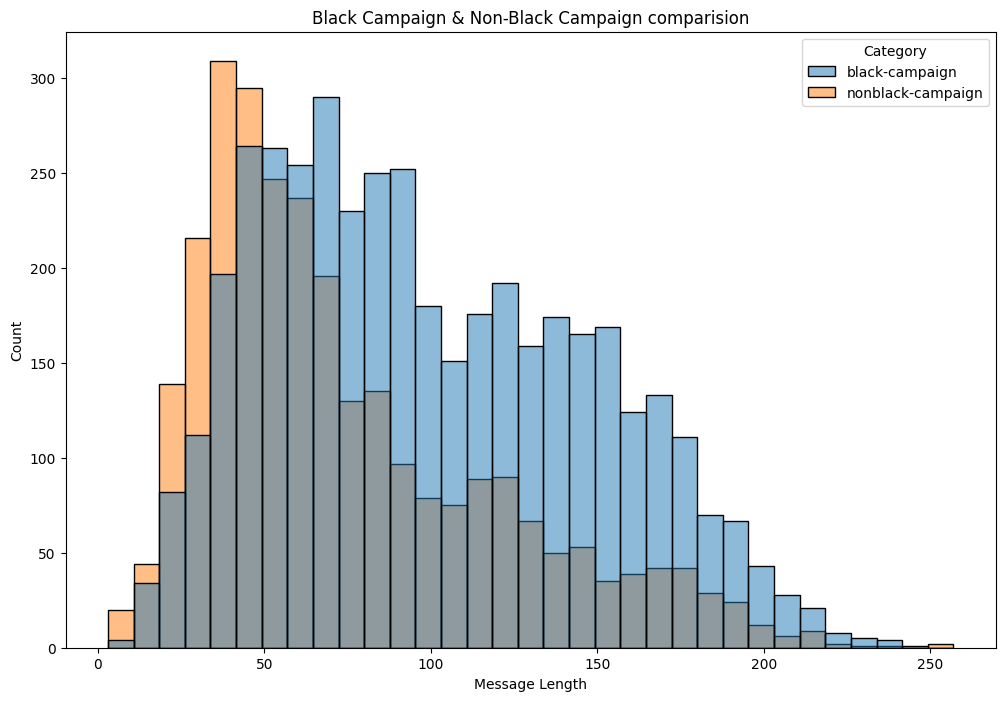

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=data["Message Length"],
    hue=data["Category"],
    #palette={"black-campaign": "darkred", "nonblack-campaign": "green"}  # Ganti warna sesuai keinginan
    #palette={"black-campaign": "r", "nonblack-campaign": "g"}  # Ganti warna sesuai keinginan
    #palette='Paired'  # Ganti warna sesuai keinginan
)
plt.title("Black Campaign & Non-Black Campaign comparision")
plt.show()


In [ ]:
pos_desc=data[data["Category"]=="nonblack-campaign"]["Message Length"].describe()
neg_desc=data[data["Category"]=="black-campaign"]["Message Length"].describe()

print("Non Black Campaign Messege Length Description:\n",pos_desc)
print("************************************")
print("Black Campaign Message Length Description:\n",neg_desc)

Non Black Campaign Messege Length Description:
 count    2812.000000
mean       74.593172
std        44.992227
min         3.000000
25%        41.000000
50%        61.000000
75%       100.000000
max       257.000000
Name: Message Length, dtype: float64
************************************
Black Campaign Message Length Description:
 count    4213.000000
mean       99.312129
std        48.237223
min         5.000000
25%        60.000000
50%        92.000000
75%       137.000000
max       245.000000
Name: Message Length, dtype: float64


In [ ]:
data["Category"].value_counts()

black-campaign       4213
nonblack-campaign    2812
Name: Category, dtype: int64

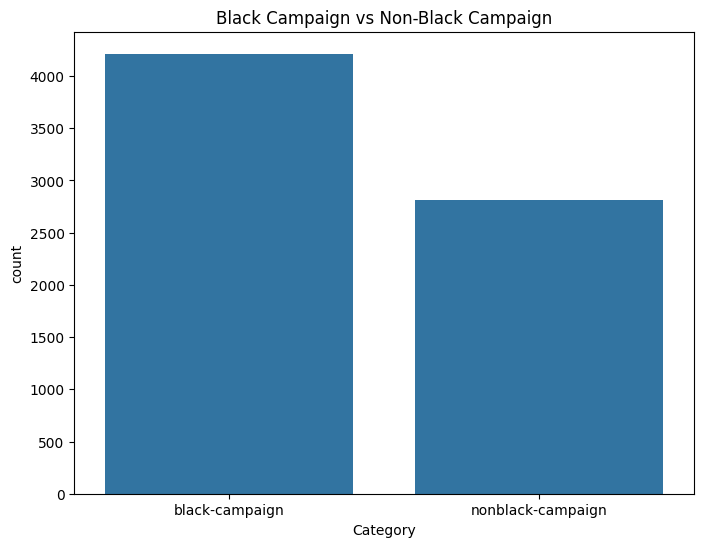

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.countplot(
    data=data,
    x="Category",
       #palette={"black-campaign": "firebrick", "nonblack-campaign": "mediumspringgreen"}  # Ganti warna sesuai keinginan
)

plt.title("Black Campaign vs Non-Black Campaign")
plt.show()

In [ ]:
pos_count=data["Category"].value_counts()[0]
neg_count=data["Category"].value_counts()[1]

total_count=data.shape[0]

print("Non Black Campaign contains:{:.2f}% of total data.".format(pos_count/total_count*100))
print("Black Campaign contains:{:.2f}% of total data.".format(neg_count/total_count*100))


Non Black Campaign contains:59.97% of total data.
Black Campaign contains:40.03% of total data.


In [ ]:
#compute the length of majority & minority class
minority_len=len(data[data["Category"]=="nonblack-campaign"])
majority_len=len(data[data["Category"]=="black-campaign"])

#store the indices of majority and minority class
minority_indices=data[data["Category"]=="nonblack-campaign"].index
majority_indices=data[data["Category"]=="black-campaign"].index

#generate new majority indices from the total majority_indices
#with size equal to minority class length so we obtain equivalent number of indices length
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)

#concatenate the two indices to obtain indices of new dataframe
undersampled_indices=np.concatenate([minority_indices,random_majority_indices])

#create df using new indices
df=data.loc[undersampled_indices]

#shuffle the sample
df=df.sample(frac=1)

#reset the index as its all mixed
df=df.reset_index()

#drop the older index
df=df.drop(
    columns=["index"],
)

In [ ]:
df.shape

(5624, 7)

In [ ]:
df["Category"].value_counts()

nonblack-campaign    2812
black-campaign       2812
Name: Category, dtype: int64

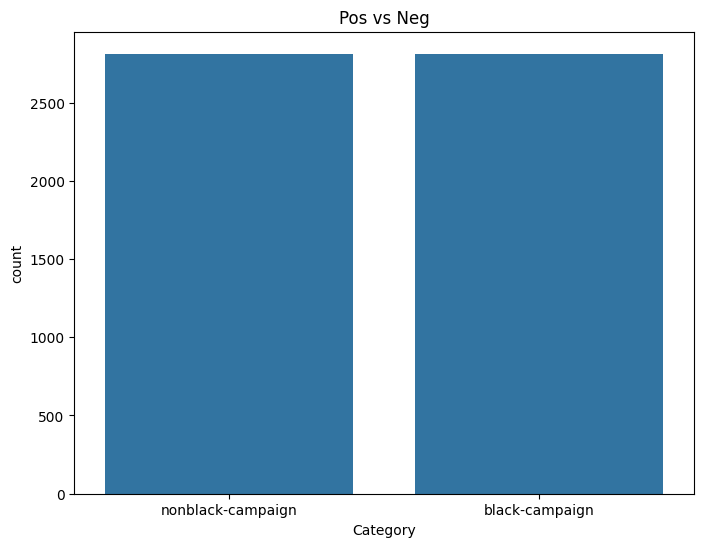

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x="Category",
        #palette={"black-campaign": "darkred", "nonblack-campaign": "green"}  # Ganti warna sesuai keinginan
)
plt.title("Pos vs Neg")
plt.show()

In [ ]:
df.head()

,created_at,username,text,prepros_text,Message,Category,Message Length
0,Sat Sep 30 10:10:46 +0000 2023,Abid92016,@ganjarpranowo @IdeafestID Bergerak untuk maju...,bergerak untuk maju bersama pak ganjar para pe...,gerak maju ganjar pemuda butuh dukung fasilita...,nonblack-campaign,110
1,Wed Oct 18 14:09:55 +0000 2023,Franyy51,Hakkul yaqiiin pasti menang dan mampu bawa Ind...,hakkul yaqiiin pasti menang dan mampu bawa ind...,hakkul yaqiiin menang bawa indonesia sejahtera...,nonblack-campaign,78
2,Wed Oct 18 01:42:42 +0000 2023,muhammadsyakur2,satu yg menurut ane prestasi terbaik Anies Bas...,satu yg menurut ane prestasi terbaik anies bas...,ane prestasi baik anies baswedan adlh menguran...,nonblack-campaign,186
3,Sat Sep 30 02:57:09 +0000 2023,Sigmahalim,@handayani_44277 @Aryprasetyo85 @jokowi @ganja...,nakula anakkolong yantie andika juragannya bec...,nakula anakkolong yantie andika juragan becus,black-campaign,45
4,Thu Oct 19 17:46:19 +0000 2023,renagata2,@KataNadiaaa Aku teruss mendukung keras beliau...,aku teruss mendukung keras beliau yakni pa gan...,teruss dukung keras beliau pa ganjar gaada rag...,black-campaign,85


In [ ]:
df["Label"]=df["Category"].map(
    {
        "nonblack-campaign":0,
        "black-campaign":1
    }
)

In [ ]:
df.head()

,created_at,username,text,prepros_text,Message,Category,Message Length,Label
0,Sat Sep 30 10:10:46 +0000 2023,Abid92016,@ganjarpranowo @IdeafestID Bergerak untuk maju...,bergerak untuk maju bersama pak ganjar para pe...,gerak maju ganjar pemuda butuh dukung fasilita...,nonblack-campaign,110,0
1,Wed Oct 18 14:09:55 +0000 2023,Franyy51,Hakkul yaqiiin pasti menang dan mampu bawa Ind...,hakkul yaqiiin pasti menang dan mampu bawa ind...,hakkul yaqiiin menang bawa indonesia sejahtera...,nonblack-campaign,78,0
2,Wed Oct 18 01:42:42 +0000 2023,muhammadsyakur2,satu yg menurut ane prestasi terbaik Anies Bas...,satu yg menurut ane prestasi terbaik anies bas...,ane prestasi baik anies baswedan adlh menguran...,nonblack-campaign,186,0
3,Sat Sep 30 02:57:09 +0000 2023,Sigmahalim,@handayani_44277 @Aryprasetyo85 @jokowi @ganja...,nakula anakkolong yantie andika juragannya bec...,nakula anakkolong yantie andika juragan becus,black-campaign,45,1
4,Thu Oct 19 17:46:19 +0000 2023,renagata2,@KataNadiaaa Aku teruss mendukung keras beliau...,aku teruss mendukung keras beliau yakni pa gan...,teruss dukung keras beliau pa ganjar gaada rag...,black-campaign,85,1


# [No Need] PrePros data

In [ ]:
#install Sastrawi
#pip install sastrawi

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


digunakan untuk melakukan preprocessing pada teks. Preprocessing teks adalah tahap pembersihan dan pengolahan data teks sebelum dilakukan analisis atau pemrosesan lebih lanjut.

Pada script di atas, dimana ada import module re dan nltk. Module re (regular expression) digunakan untuk menangani ekspresi reguler, yaitu pola khusus yang dapat digunakan untuk mencocokkan karakter-karakter dalam teks. Module nltk (Natural Language Toolkit) merupakan paket perangkat lunak untuk pemrosesan bahasa alami.

In [ ]:
#declare empty list to store tokenized message
corpus=[]

#iterate through the df["Message"]
for message in df["Message"]:

    #replace every special characters, numbers etc.. with whitespace of message
    #It will help retain only letter/alphabets
    message=re.sub("[^a-zA-Z]"," ",message)

    #convert every letters to its lowercase
    message=message.lower()

    #split the word into individual word list
    message=message.split()

    #perform stemming using PorterStemmer for all non-english-stopwords
    message=[stemmer.stem(words)
            for words in message
             if words not in set(stopwords.words("indonesian"))
            ]
    #join the word lists with the whitespace
    message=" ".join(message)

    #append the message in corpus list
    corpus.append(message)

# Proses Embedding

if in ML use weighting with TF-IDF in DL you can use the embedding process with One Hot.

One-Hot Encoding and TF-IDF (Term Frequency-Inverse Document Frequency) are two common methods used in natural language processing. One-Hot Encoding converts each word in a document into a binary vector with a size corresponding to the total vocabulary in the corpus, where each word is represented by a vector that has a value of 1 at the index corresponding to the word and a value of 0 at the other indexes. Meanwhile, TF-IDF assigns a numerical weight to each word based on how often it appears in a document and how common it is across the corpus. TF-IDF values are higher for words that appear frequently in a document but rarely in other documents, highlighting the importance of the word in the context of that document. So, the difference lies in the vector representation; One-Hot Encoding provides a simple binary representation, whereas TF-IDF provides weights that reflect the relative significance of the word in the document and the corpus as a whole.

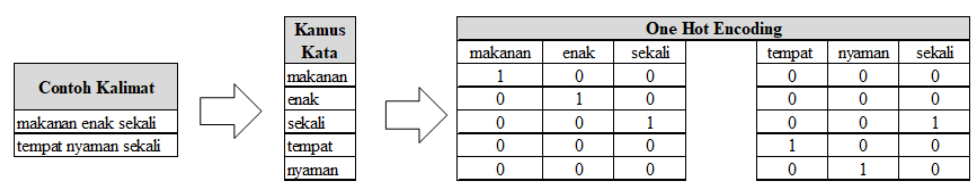

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000

oneHot_doc=[one_hot(words,n=vocab_size)
           for words in corpus
           ]

In [ ]:
df["Message Length"].describe()

count    5624.000000
mean       86.718350
std        48.111443
min         3.000000
25%        48.000000
50%        75.000000
75%       121.000000
max       257.000000
Name: Message Length, dtype: float64

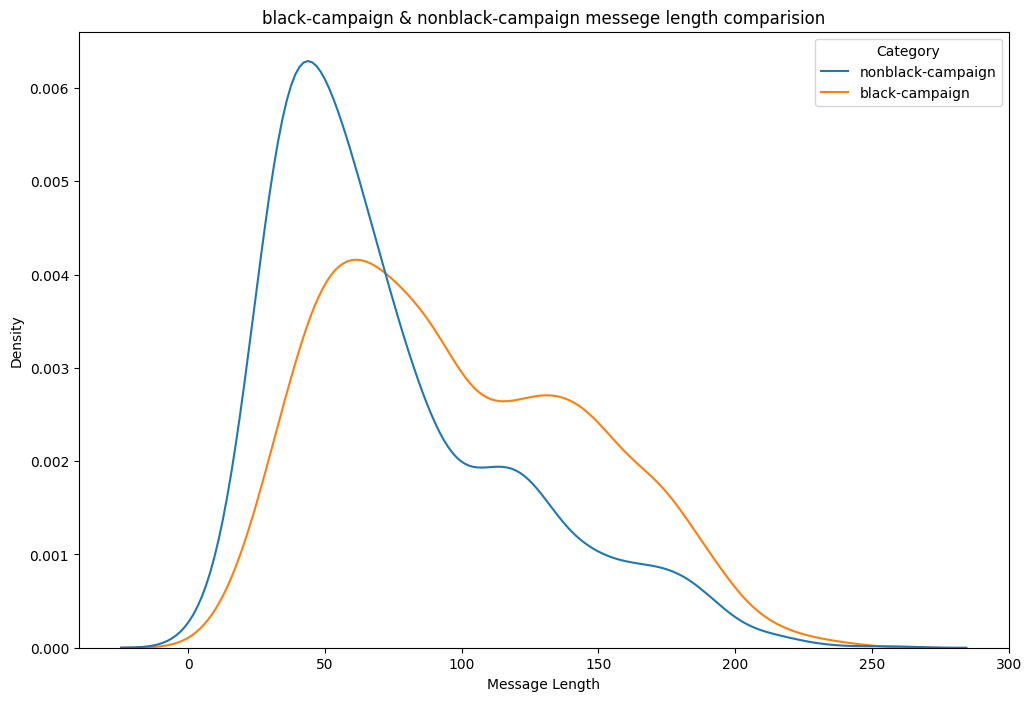

In [ ]:
#Visualize the Message length using kdeplot.

fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=df["Message Length"],
    hue=df["Category"],
    #palette={"black-campaign": "darkred", "nonblack-campaign": "green"}  # Ganti warna sesuai keinginan
)
plt.title("black-campaign & nonblack-campaign messege length comparision")
plt.show()

In [ ]:
#use pad_sequences from hard to do the word insertion.
#This will make each list the same length (sentence length) which we can later insert into the model.

from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)

This function uses TensorFlow's pad_sequences to add padding to each document in *oneHot_doc* to make each document length *sentence_len*. Padding is done at the beginning of the document *(padding=“pre”)*, meaning that zeros will be added at the beginning of each document if the document length is less than *sentence_len*. This is useful because machine learning models require consistent length input.

In [ ]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=df["Label"]

This function creates a new DataFrame (extract_features) using the padding result data *(embedded_doc)*. This DataFrame will most likely be used as input features for the model.

In [ ]:
df_final=pd.concat([extract_features,target],axis=1)

This function merges the processed features with the target column *(“Label”)* of the original DataFrame (df). The *axis=1* indicates that the merging is done by column, not row. The result is a DataFrame *df_final* that is ready to be used for training and testing machine learning models.

In [ ]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,...,9755,6688,4038,9517,9825,4849,4412,6216,7284,0
1,0,0,0,0,0,0,0,0,0,0,...,206,6973,6911,2951,4412,5679,7775,3957,7775,0
2,0,0,0,0,0,0,0,0,0,0,...,721,246,844,4553,2212,2876,8273,1507,7284,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4766,9426,7617,7274,5711,2152,1
4,0,0,0,0,0,0,0,0,0,0,...,5338,9264,1291,962,5778,2926,4412,7775,6695,1


One-Hot Encoding converts each word in a document into a binary vector with a size corresponding to the total vocabulary in the corpus, where each word is represented by a vector that has a value of 1 at the index corresponding to the word and a value of 0 at the other indices.

In [ ]:
X=df_final.drop("Label",axis=1)
y=df_final["Label"]

In [ ]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,...,9755,6688,4038,9517,9825,4849,4412,6216,7284,0
1,0,0,0,0,0,0,0,0,0,0,...,206,6973,6911,2951,4412,5679,7775,3957,7775,0
2,0,0,0,0,0,0,0,0,0,0,...,721,246,844,4553,2212,2876,8273,1507,7284,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4766,9426,7617,7274,5711,2152,1
4,0,0,0,0,0,0,0,0,0,0,...,5338,9264,1291,962,5778,2926,4412,7775,6695,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9517,6364,9517,7284,0
5620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2873,6911,7846,0
5621,0,0,0,0,0,0,0,0,0,0,...,0,0,2206,206,9844,5566,1771,2882,1346,1
5622,0,0,0,0,0,0,0,0,0,0,...,3826,1260,9702,2552,6911,9795,4412,9794,7284,0


## [No Need] to RUN. We will now split the dataset for training,validataing and testing sets.

In [ ]:
# from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [ ]:
#X_trainval,X_test,y_trainval,y_test=train_test_split(
#    X,
#    y,
#    random_state=42,
#    test_size=0.15
#)

In [ ]:
#X_train,X_val,y_train,y_val=train_test_split(
#    X_trainval,
#    y_trainval,
#    random_state=42,
#    test_size=0.15
#)

**Kita tidak pakai script diatas:** script diatas, dataset akan dibagi menjadi dua bagian dengan ukuran 15% untuk dataset Test (X_test dan y_test) dan 85% untuk dataset Train dan validasi (X_trainval dan y_trainval). Train 42.5% dan validasi 42.5%

# Balancing Labels 0 and 1 in Train, Test, and Validation to avoid Overfitting

To make the label distribution balanced in each set (train, test, and validation), the *StratifiedShuffleSplit* module of ***scikit-learn*** is added.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [ ]:
# Divide the data into train+validation and test while maintaining a balanced label distribution
sss_trainval_test = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
trainval_idx, test_idx = next(sss_trainval_test.split(X, y))

X_trainval, X_test = X.iloc[trainval_idx], X.iloc[test_idx]
y_trainval, y_test = y.iloc[trainval_idx], y.iloc[test_idx]

# Split train+validation data into train and validation maintaining an equal distribution of labels
sss_train_val = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
train_idx, val_idx = next(sss_train_val.split(X_trainval, y_trainval))

X_train, X_val = X_trainval.iloc[train_idx], X_trainval.iloc[val_idx]
y_train, y_val = y_trainval.iloc[train_idx], y_trainval.iloc[val_idx]


In [ ]:
# Calculating the length of each set
total_length = len(X)
train_length = len(X_train)
val_length = len(X_val)
test_length = len(X_test)

# Calculating distribution percentage
train_percentage = (train_length / total_length) * 100
val_percentage = (val_length / total_length) * 100
test_percentage = (test_length / total_length) * 100

# Displaying results
print(f"Persentase Data Train: {train_percentage:.1f}%")
print(f"Persentase Data Validation: {val_percentage:.1f}%")
print(f"Persentase Data Test: {test_percentage:.1f}%")

Persentase Data Train: 42.5%
Persentase Data Validation: 42.5%
Persentase Data Test: 15.0%


<ipython-input-43-22ad9ac4fe45>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_val_labels.map({0: "Black campaign", 1: "Non-black campaign"}), palette='viridis')


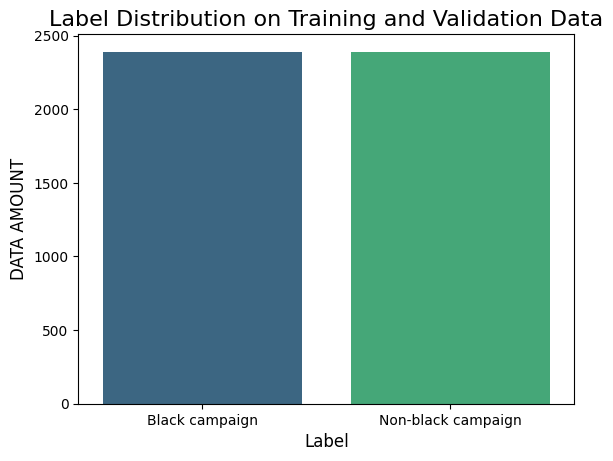

<ipython-input-43-22ad9ac4fe45>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test.map({0: "Black campaign", 1: "Non-black campaign"}), palette='viridis')


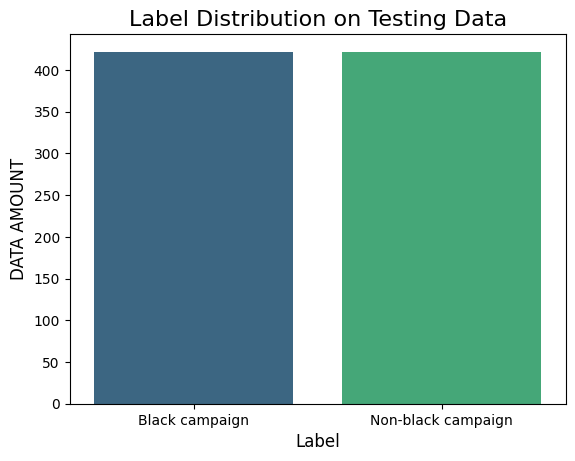

In [ ]:
# Combining training and validation data to create plots
train_val_data = pd.concat([X_train, X_val])
train_val_labels = pd.concat([y_train, y_val])

# Create histograms for label distribution on training and validation data
sns.countplot(x=train_val_labels.map({0: "Black campaign", 1: "Non-black campaign"}), palette='viridis')
plt.title('Label Distribution on Training and Validation Data', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('DATA AMOUNT', fontsize=12)
plt.show()

# Create a histogram for the label distribution of the test data
sns.countplot(x=y_test.map({0: "Black campaign", 1: "Non-black campaign"}), palette='viridis')
plt.title('Label Distribution on Testing Data', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('DATA AMOUNT', fontsize=12)
plt.show()

<ipython-input-44-c8988647e9fa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train.map({0: "Black campaign", 1: "Non-black campaign"}), palette=train_color, ax=axes[0])
<ipython-input-44-c8988647e9fa>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_val.map({0: "Black campaign", 1: "Non-black campaign"}), palette=val_color, ax=axes[1])
<ipython-input-44-c8988647e9fa>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test.map({0: "Black campaign", 1: "Non-black campaign"}), palette=test_color, ax=axes[2])


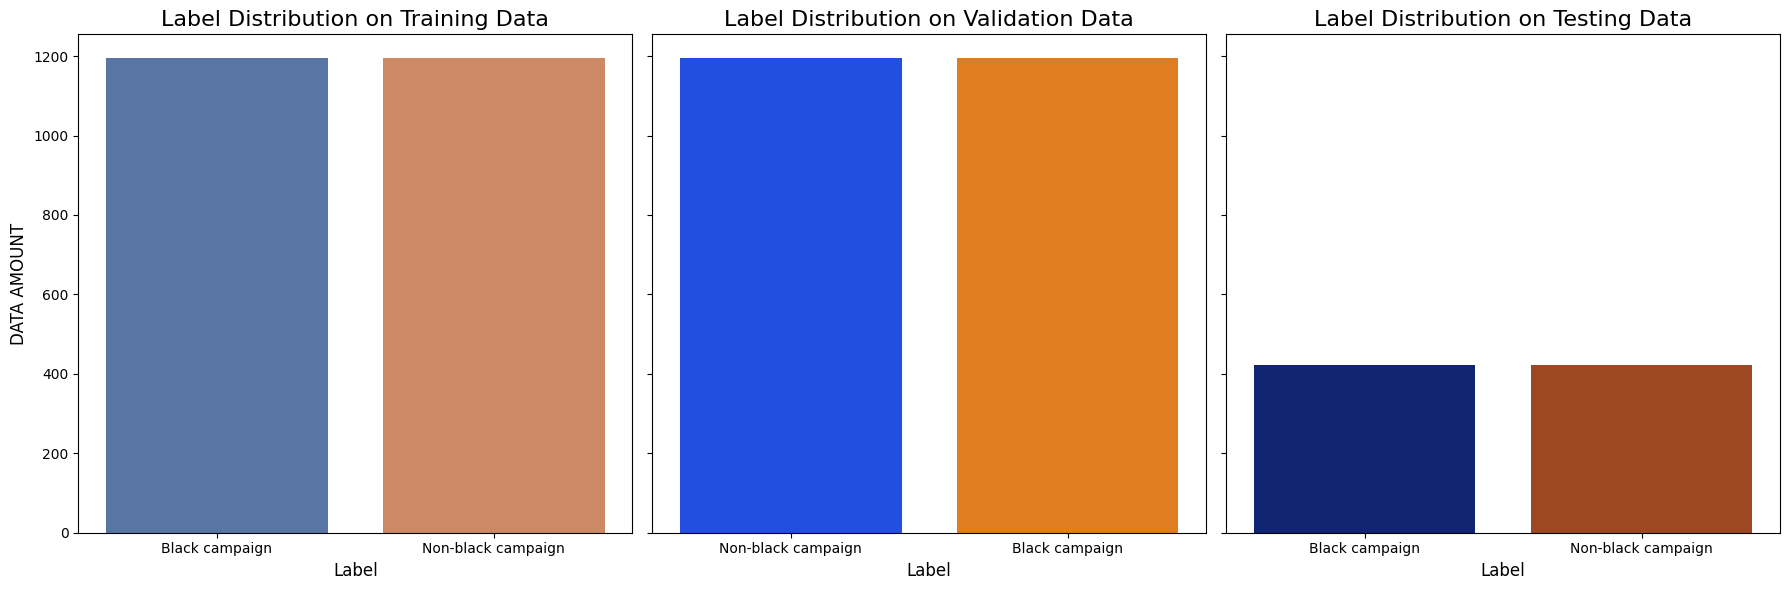

In [ ]:
# Mengatur warna palet untuk masing-masing set data
#train_color = {"Black campaign": 'tomato', "Non-black campaign": 'limegreen'}
#val_color = {"Black campaign": 'red', "Non-black campaign": 'green'}
#test_color = {"Black campaign": 'darkred', "Non-black campaign": 'darkgreen'}
train_color = ('deep')
val_color = ('bright')
test_color = ('dark')

# Membuat subplot dengan 1 baris dan 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot untuk data pelatihan pada subplot pertama (kiri)
sns.countplot(x=y_train.map({0: "Black campaign", 1: "Non-black campaign"}), palette=train_color, ax=axes[0])
axes[0].set_title('Label Distribution on Training Data', fontsize=16)
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_ylabel('DATA AMOUNT', fontsize=12)

# Plot untuk data validasi pada subplot kedua (tengah)
sns.countplot(x=y_val.map({0: "Black campaign", 1: "Non-black campaign"}), palette=val_color, ax=axes[1])
axes[1].set_title('Label Distribution on Validation Data', fontsize=16)
axes[1].set_xlabel('Label', fontsize=12)
axes[1].set_ylabel('DATA AMOUNT', fontsize=12)

# Plot untuk data pengujian pada subplot ketiga (kanan)
sns.countplot(x=y_test.map({0: "Black campaign", 1: "Non-black campaign"}), palette=test_color, ax=axes[2])
axes[2].set_title('Label Distribution on Testing Data', fontsize=16)
axes[2].set_xlabel('Label', fontsize=12)
axes[2].set_ylabel('DATA AMOUNT', fontsize=12)

# Menentukan layout untuk menghindari tumpang tindih
plt.tight_layout()
plt.show()

# Dont RUN! Pelatihan masih Overfitting ⚠

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

import libraries to create model

In [ ]:
model=Sequential()

In [ ]:
feature_num=100
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=feature_num,
        input_length=sentence_len
    )
)
model.add(
    LSTM(
    units=128
    )
)

model.add(
    Dense(
        units=1,
        activation="sigmoid"
    )
)

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
#model.fit(
 #   X_train,
  #  y_train,
   # validation_data=(
    #    X_val,
     #   y_val
   # ),
  # epochs=10
#)

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=5
)

Epoch 1/5
75/75 [==============================] - 18s 157ms/step - loss: 0.4893 - accuracy: 0.7950 - val_loss: 0.2613 - val_accuracy: 0.9004
Epoch 2/5
75/75 [==============================] - 6s 79ms/step - loss: 0.1684 - accuracy: 0.9435 - val_loss: 0.2359 - val_accuracy: 0.9029
Epoch 3/5
75/75 [==============================] - 5s 69ms/step - loss: 0.0914 - accuracy: 0.9715 - val_loss: 0.2531 - val_accuracy: 0.9130
Epoch 4/5
75/75 [==============================] - 4s 49ms/step - loss: 0.0491 - accuracy: 0.9858 - val_loss: 0.3004 - val_accuracy: 0.8925
Epoch 5/5
75/75 [==============================] - 3s 39ms/step - loss: 0.0415 - accuracy: 0.9879 - val_loss: 0.3497 - val_accuracy: 0.8983


# Dropout and Early Stopping avoid Overfitting

**Overfitting:**
Overfitting occurs when a machine learning model is too complex and starts to “memorize” the training data very well, even down to uncommon details. As a result, the model's performance on training data may be very high, but its performance on unseen data (such as validation or test data) is poor because the model cannot generalize patterns well.

**Dropout:**
Dropout is a popular overfitting prevention technique. It works by randomly “disabling” a fraction of the units or neurons in each layer during training. By doing this, dropout prevents certain neurons from becoming too dependent on other neurons, thus encouraging each neuron to become more independent and strengthening the generalization of the model.

**Early Stopping:**
Early stopping is another technique to combat overfitting. The basic idea is to stop the training process as soon as the performance on the validation dataset no longer improves. This is done by monitoring the metrics on the validation dataset (e.g., accuracy or loss) and stopping training when they no longer improve or even start to decline. This helps the model not to become too complex and overly customized to the training data.

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
feature_num = 100
# Embedding Layer
model.add(Embedding(input_dim=vocab_size, output_dim=feature_num, input_length=sentence_len))

# LSTM Layer dengan Dropout
model.add(LSTM(units=128)) #lapisan LSTM (64)
model.add(Dropout(0.2))  # Menambahkan dropout dengan tingkat 0.2 (20%)

# Dense Layer
model.add(Dense(units=1, activation="sigmoid"))

# Kompilasi model dengan optimizer Adam dan learning rate
learning_rate = 0.0001  # Sesuaikan dengan nilai yang diinginkan
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Melatih model dengan data latihan dan validasi
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=6, callbacks=[early_stopping])


Epoch 1/6
75/75 [==============================] - 17s 169ms/step - loss: 0.6857 - accuracy: 0.5762 - val_loss: 0.6699 - val_accuracy: 0.5937
Epoch 2/6
75/75 [==============================] - 8s 100ms/step - loss: 0.6366 - accuracy: 0.6607 - val_loss: 0.5759 - val_accuracy: 0.7084
Epoch 3/6
75/75 [==============================] - 4s 59ms/step - loss: 0.5456 - accuracy: 0.7510 - val_loss: 0.4880 - val_accuracy: 0.7883
Epoch 4/6
75/75 [==============================] - 4s 52ms/step - loss: 0.4270 - accuracy: 0.8238 - val_loss: 0.3885 - val_accuracy: 0.8477
Epoch 5/6
75/75 [==============================] - 3s 34ms/step - loss: 0.3209 - accuracy: 0.8833 - val_loss: 0.3247 - val_accuracy: 0.8937
Epoch 6/6
75/75 [==============================] - 2s 28ms/step - loss: 0.2553 - accuracy: 0.9243 - val_loss: 0.2800 - val_accuracy: 0.8921


# Grafik Pelatihan

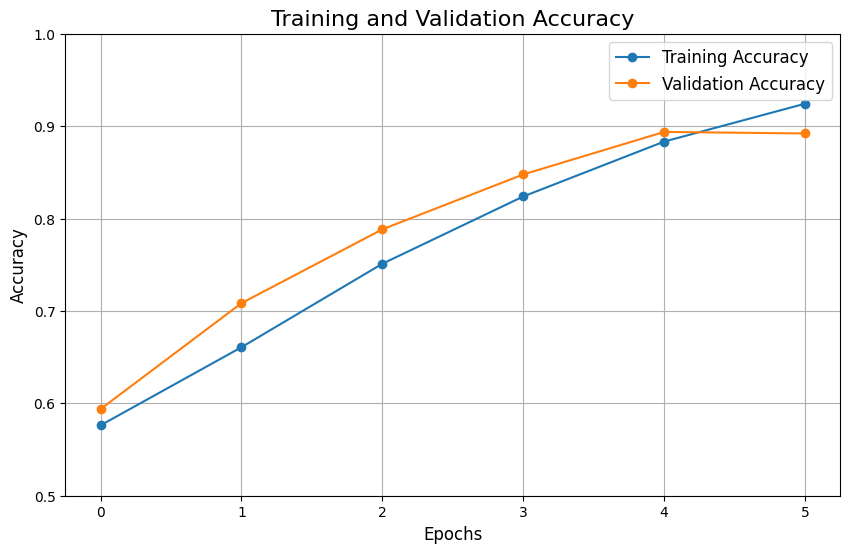

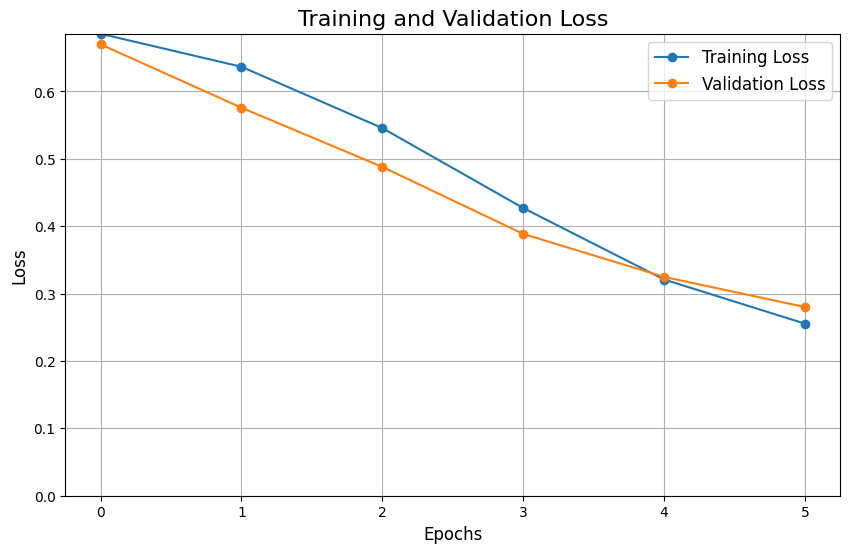

In [ ]:
# Visualizing the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.ylim(0.5, 1)  # Set limit for y-axis
plt.grid(True)
plt.show()

# Visualizing the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])))  # Set limit for y-axis
plt.grid(True)
plt.show()

**With the addition of Dropout and Early Stopping functions, the data does not suffer from overfitting.

In general, overfitting occurs when a model learns the training data too well and cannot generalize to new data. This can be seen in the Training Loss and Validation curves. The Training Loss curve decreases as the model learns the training data, while the Validation Loss curve flattens or decreases more slowly. If the validation loss curve starts to increase after a few epochs, this is a sign that the model is overfitting.

In the data provided, the Validation Loss curve does not increase after any epoch. In fact, it decreases slightly between epochs 2 and 3. This indicates that the model generalizes well on the validation data and is not overfitting.

# Evaluation Process

Since the model has been equipped with the required dataset, it is now time how our model predicts the test data that we have separated earlier.

The predictions will be stored in a boolean array where **prediction values greater than 0.5 will be assigned the value True (BC) and those smaller than 0.5 will be assigned the value False (NBC)**.

First of all, keep in mind that the accuracy value at the end of training **(accuracy: 0.9712)** that you see from the training history refers to the model's performance on the training data (X_train, y_train) and validation data (X_val, y_val) during the training process. This gives an idea of how well the model learned the patterns in the data used during training.

Meanwhile, you calculate the accuracy value after training **(92.42%)** using the test data (X_test, y_test) using accuracy_score from Scikit-Learn. This gives an idea of how well the model can make predictions on new data that was never seen during training.

In [ ]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

27/27 [==============================] - 1s 8ms/step


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
#Model memprediksi dengan cukup baik pada data uji yang terlihat dari skor akurasi.

score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

Test Score:91.23%


27/27 [==============================] - 0s 7ms/step


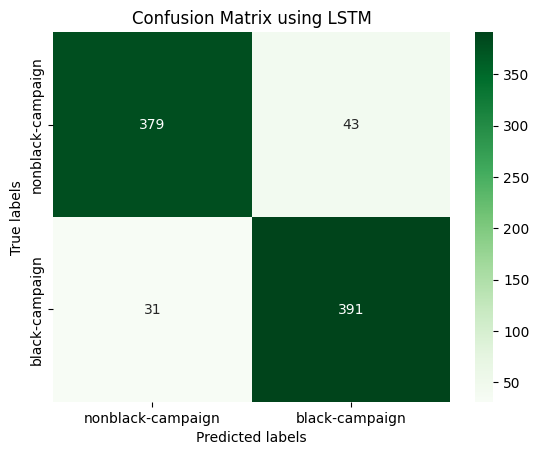

Confusion Matrix LSTM:
[[379  43]
 [ 31 391]]


In [ ]:
# Prediksi model (pastikan variabel y_pred sudah diinisialisasi dengan hasil prediksi)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Konversi label 0 dan 1 menjadi nonblack-campaign dan black-campaign
y_test_labels = ['nonblack-campaign' if label == 0 else 'black-campaign' for label in y_test]
y_pred_labels = ['nonblack-campaign' if label == 0 else 'black-campaign' for label in y_pred]

# Membuat confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plotting heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['nonblack-campaign', 'black-campaign'], yticklabels=['nonblack-campaign', 'black-campaign'])
plt.title("Confusion Matrix using LSTM")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

# Menampilkan confusion matrix
print("Confusion Matrix LSTM:")
print(cm)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
# Tampilkan hasil metrik evaluasi
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Akurasi: 91.23%
Presisi: 0.92
Recall: 0.90
F1-score: 0.91


# Proses Deteksi V1

In [ ]:
#The function take model and message as parameter
def classify_message(model,message):

    #We will treat message as a paragraphs containing multiple sentences(lines)
    #we will extract individual lines
    for sentences in message:
        sentences=nltk.sent_tokenize(message)
        #sentences   = stemmer.stem(message)

        #Iterate over individual sentences
        for sentence in sentences:
            #replace all special characters
            words=re.sub("[^a-zA-Z]"," ",sentence)

            #perform word tokenization of all non-english-stopwords
            if words not in set(stopwords.words('english')):
                word=nltk.word_tokenize(words)
                word=" ".join(word)

    #perform one_hot on tokenized word
    oneHot=[one_hot(word,n=vocab_size)]

    #create an embedded documnet using pad_sequences
    #this can be fed to our model
    text=pad_sequences(oneHot,maxlen=sentence_len,padding="pre")

    #predict the text using model
    predict=model.predict(text)

    #if predict value is greater than 0.5 its not a BC
    if predict>0.5:
        print("black-campaign")
    #else the message is a NBC
    else:
        print("nonblack-campaign")

In [ ]:
#TEST DETEKSI
#message="Ganjar Yakin Menang di Jateng meski ada Gibran"
message="Anies-Muhaimin Sukses Membawa Gaya Kampanye Baru di Indonesia, Biasa Dilakukan di Negara Maju"

classify_message(model, message)

1/1 [==============================] - 0s 100ms/step
nonblack-campaign


Deteksi Model:
*(Black Campaign ❌,
Non-Black Campaign ✔️) *

In [ ]:
messages = ["Ganjar Yakin Menang di Jateng meski ada Gibran",
            "Ganjar melakukan Pelanggaran HAM Kasus Wadas dan Kendeng",
            "Prabowo Unggul Atas Ganjar dan Anies di Simulasi Pilpres Dua Nama",
            "KPK Selidiki Anies Terkait Korupsi Formula E",
            "Survei terbaru IPO Anies-Muhaimin sukses menyalip Ganjar-Mahfud.. Selangkah lagi menang satu putaran!!",
            "Pencalonan Gibran Rakabuming Sebagai wakil Presiden Prabowo Dianggap Cacat Hukum"]

for i, message in enumerate(messages, start=1):
    result = classify_message(model, message)
    print(f"{i}/{len(messages)}")
    if result is not None:
        print(result)
    else:
        print(f"message{i}: {message}")

1/1 [==============================] - 0s 20ms/step
nonblack-campaign
1/6
message1: Ganjar Yakin Menang di Jateng meski ada Gibran
1/1 [==============================] - 0s 19ms/step
black-campaign
2/6
message2: Ganjar melakukan Pelanggaran HAM Kasus Wadas dan Kendeng
1/1 [==============================] - 0s 21ms/step
nonblack-campaign
3/6
message3: Prabowo Unggul Atas Ganjar dan Anies di Simulasi Pilpres Dua Nama
1/1 [==============================] - 0s 27ms/step
black-campaign
4/6
message4: KPK Selidiki Anies Terkait Korupsi Formula E
1/1 [==============================] - 0s 21ms/step
nonblack-campaign
5/6
message5: Survei terbaru IPO Anies-Muhaimin sukses menyalip Ganjar-Mahfud.. Selangkah lagi menang satu putaran!!
1/1 [==============================] - 0s 19ms/step
black-campaign
6/6
message6: Pencalonan Gibran Rakabuming Sebagai wakil Presiden Prabowo Dianggap Cacat Hukum


# Proses Deteksi V2

In [ ]:
pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
# Function to classify messages
def classify_message(model, message):
    # Create a StopWord Remover
    stopword_remover = StopWordRemoverFactory().create_stop_word_remover()

    # Tokenize sentences
    sentences = nltk.sent_tokenize(message)

    # Process each sentence
    for sentence in sentences:
        # Remove special characters
        words = re.sub("[^a-zA-Z]", " ", sentence)

        # Perform stopword removal using Sastrawi
        words = stopword_remover.remove(words)

        # Tokenize words
        word = nltk.word_tokenize(words)
        word = " ".join(word)

        # Perform one_hot on tokenized word
        oneHot = [one_hot(word, n=vocab_size)]

        # Create an embedded document using pad_sequences
        text = pad_sequences(oneHot, maxlen=sentence_len, padding="pre")

        # Predict the text using the model
        predict = model.predict(text)

        # If the predict value is greater than 0.5, it's not a BC
        if predict > 0.5:
            print("black campaign")
        # Else the message is a BC
        else:
            print("non-black campaign")

In [ ]:
#TEST DETEKSI
message="Ganjar Yakin Menang di Jateng meski ada Gibran"
#message="Waspadalah, krn kpu & bawaslu tdk netral nih, pdahal paslon prabowo-gibran itu cacat hukum, terbukti langgar konstitusi"

classify_message(model, message)

1/1 [==============================] - 0s 20ms/step
non-black campaign


In [ ]:
messages = ["Ganjar Yakin Menang di Jateng meski ada Gibran",
            "Ganjar melakukan Pelanggaran HAM Kasus Wadas dan Kendeng",
            "Prabowo Unggul Atas Ganjar dan Anies di Simulasi Pilpres Dua Nama",
            "KPK Selidiki Anies Terkait Korupsi Formula E",
            "Survei terbaru IPO Anies-Muhaimin sukses menyalip Ganjar-Mahfud.. Selangkah lagi menang satu putaran!!",
            "Pencalonan Gibran Rakabuming Sebagai wakil Presiden Prabowo Dianggap Cacat Hukum"]

for i, message in enumerate(messages, start=1):
    result = classify_message(model, message)
    print(f"{i}/{len(messages)}")
    if result is not None:
        print(result)
    else:
        print(f"message{i}: {message}")

1/1 [==============================] - 0s 20ms/step
non-black campaign
1/6
message1: Ganjar Yakin Menang di Jateng meski ada Gibran
1/1 [==============================] - 0s 18ms/step
black campaign
2/6
message2: Ganjar melakukan Pelanggaran HAM Kasus Wadas dan Kendeng
1/1 [==============================] - 0s 20ms/step
non-black campaign
3/6
message3: Prabowo Unggul Atas Ganjar dan Anies di Simulasi Pilpres Dua Nama
1/1 [==============================] - 0s 21ms/step
black campaign
4/6
message4: KPK Selidiki Anies Terkait Korupsi Formula E
1/1 [==============================] - 0s 21ms/step
non-black campaign
1/1 [==============================] - 0s 18ms/step
non-black campaign
5/6
message5: Survei terbaru IPO Anies-Muhaimin sukses menyalip Ganjar-Mahfud.. Selangkah lagi menang satu putaran!!
1/1 [==============================] - 0s 21ms/step
black campaign
6/6
message6: Pencalonan Gibran Rakabuming Sebagai wakil Presiden Prabowo Dianggap Cacat Hukum


# Explainable AI, the dominant word

In [ ]:
from nltk import FreqDist, word_tokenize

In [ ]:
# Fungsi untuk membersihkan teks dari stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words("indonesian"))
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return filtered_words

# Menghitung frekuensi kata untuk setiap kategori
category_words = {}

for category in df['Category'].unique():
    category_text = " ".join(df[df['Category'] == category]['Message'])
    words = remove_stopwords(category_text)
    freq_dist = FreqDist(words)
    category_words[category] = freq_dist.most_common(30)

# Menampilkan hasil
for category, words in category_words.items():
    print(f"Top 30 words in category '{category}':")
    for word, count in words:
        print(f"{word}: {count}")
    print("\n")

Top 30 words in category 'nonblack-campaign':
ganjar: 1454
dukung: 1057
prabowo: 948
sukses: 878
anies: 858
mahfud: 856
menang: 757
indonesia: 720
unggul: 663
maju: 379
moga: 286
pasang: 273
keren: 231
pimpin: 219
presiden: 217
subianto: 216
pks: 184
md: 180
visi: 175
amin: 170
wujud: 164
pilih: 162
pranowo: 161
cepat: 161
bangun: 161
negara: 154
survei: 146
baswedan: 145
jateng: 142
rakyat: 140


Top 30 words in category 'black-campaign':
ganjar: 1214
anies: 1113
prabowo: 707
dukung: 519
korupsi: 391
jokowi: 312
gagal: 285
presiden: 277
indonesia: 267
tangkap: 244
raja: 231
arab: 228
hancur: 226
bobrok: 224
suka: 220
becus: 218
imam: 208
radikal: 201
ormas: 199
mahdi: 197
baswedan: 191
orang: 185
pilih: 171
rakyat: 162
bokep: 162
saudi: 158
capres: 156
ektp: 154
porno: 152
negara: 151




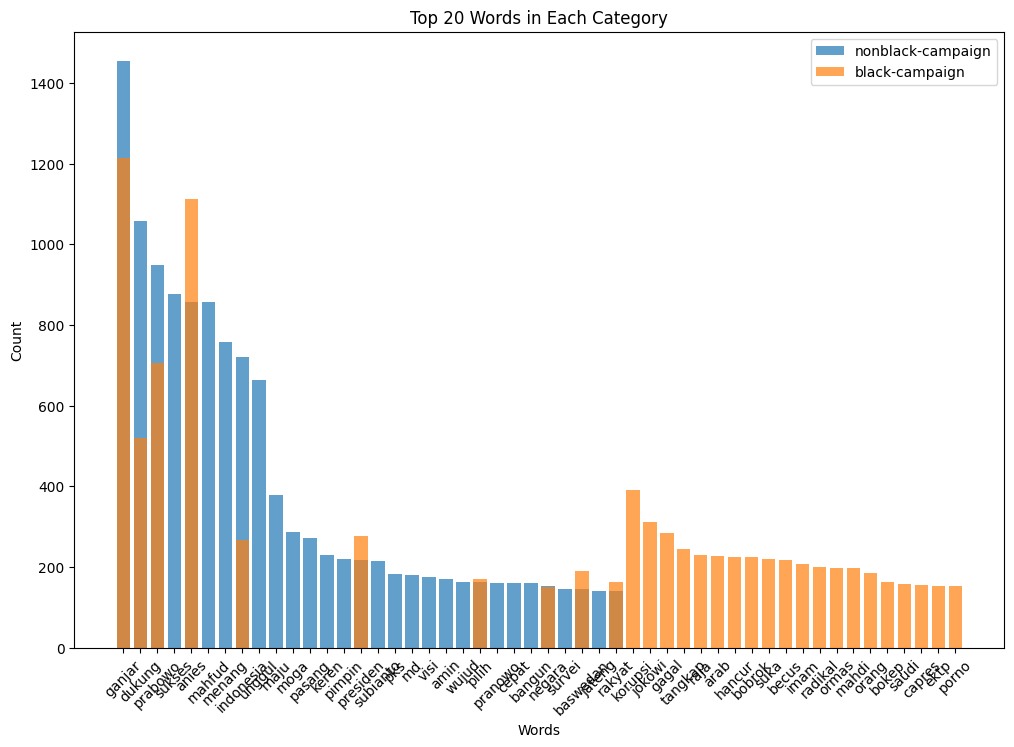

In [ ]:
# Visualisasi
plt.figure(figsize=(12, 8))

for i, (category, words) in enumerate(category_words.items()):
    word_df = pd.DataFrame(words, columns=['Word', 'Count'])
    plt.bar(word_df['Word'] + f"", word_df['Count'], alpha=0.7, label=category)

plt.title('Top 20 Words in Each Category')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Ready to Ensamble

In [ ]:
df

,created_at,username,text,prepros_text,Message,Category,Message Length,Label,Separated_Words
0,Wed Oct 18 09:04:13 +0000 2023,zkldnq2,@Perju4ng4n @Gerindra @PartaiSocmed @corbuzier...,sukses trs pak prabowo projo dukung prabowo,sukses trs prabowo projo dukung prabowo,nonblack-campaign,39,0,"[sukses, trs, prabowo, projo, dukung, prabowo]"
1,Tue Oct 10 11:40:52 +0000 2023,giojen_bigwin,@HensuAja @__AnakKolong @datuakrajoangek @prab...,anakkolong bentar lg juga di mute nih anak mas...,anakkolong bentar lg mute anak bikin hancur ku...,black-campaign,54,1,"[anakkolong, bentar, lg, mute, anak, bikin, ha..."
2,Tue Oct 03 09:31:35 +0000 2023,LutfiatiAsyifa,@negativisme @prabowo @ganjarpranowo @aniesbas...,setuju desa gw sama juga mana uda periode kaga...,tuju desa gw uda periode kagak becus,black-campaign,36,1,"[tuju, desa, gw, uda, periode, kagak, becus]"
3,Sat Oct 21 01:15:20 +0000 2023,MbakYanti_Manis,Ganjar Pranowo - Mahfud MD Menuju Indonesia Un...,ganjar pranowo mahfud md menuju indonesia ungg...,ganjar pranowo mahfud md indonesia unggul wuju...,nonblack-campaign,119,0,"[ganjar, pranowo, mahfud, md, indonesia, unggu..."
4,Tue Aug 22 03:33:24 +0000 2023,BaddrusB24865,@Tjel0up Pak @prabowo Dan pak @ganjarpranowo ...,pak dan pak hariiii lah dipuji kami pemikiran ...,hariiii puji pikir objektif nilai pilih baik,black-campaign,44,1,"[hariiii, puji, pikir, objektif, nilai, pilih,..."
...,...,...,...,...,...,...,...,...,...
5619,Thu Oct 19 06:18:00 +0000 2023,jungkiouk,Pada tau gak sihðŸ¤”?! Anies Baswedan sukses b...,pada tau gak sih anies baswedan sukses bangun ...,anies baswedan sukses bangun sekolah kelas dun...,nonblack-campaign,71,0,"[anies, baswedan, sukses, bangun, sekolah, kel..."
5620,Sat Oct 21 12:33:22 +0000 2023,Akhmad67523072,"Terlihat jelas ke ikhlassn,kejujuran dan ketul...",terlihat jelas ke ikhlassnkejujuran dan ketulu...,ikhlassnkejujuran tulus tuk abdi rakyat kesan ...,nonblack-campaign,133,0,"[ikhlassnkejujuran, tulus, tuk, abdi, rakyat, ..."
5621,Fri Oct 20 09:44:52 +0000 2023,dikarst11,@KataNadiaaa Dukung pak ganjar insyaallah past...,dukung pak ganjar insyaallah pasti menang,dukung ganjar insyaallah menang,nonblack-campaign,31,0,"[dukung, ganjar, insyaallah, menang]"
5622,Tue May 23 00:47:55 +0000 2023,silobahata,Kpk kerjaannya selama ini apa dong. Yg korupsi...,kpk kerjaannya selama ini apa dong yg korupsi ...,kpk kerja korupsi triliun tangkap anies berfoy...,black-campaign,113,1,"[kpk, kerja, korupsi, triliun, tangkap, anies,..."


In [ ]:
# Menghitung jumlah baris pada DataFrame
jumlah_data = df.shape[0]
print("Jumlah Data:", jumlah_data)

Jumlah Data: 5624


In [ ]:
# Simpan DataFrame ke file CSV
df.to_csv('data/all-data-balance.csv', index=False)

# Cek hasilnya
print("DataFrame telah disimpan ke folder datasets_new")

DataFrame telah disimpan ke folder datasets_new
